# Names: Austin He, Maya Lee, Kevin Barcenas, Luis Gamino


In [238]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Pokebase is a Pokemon API that has extensive information about each pokemon
# https://pokeapi.co/docs/v2
#import pokebase as pb

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 


# **Introduction**

### **Machine Learning Problem**
- What is the machine learning problem you are trying to solve?
- Why does this problem matter?
- What could the results of your predictive model be used for?
- Why is it important to predict the outcome you are focusing on?

### **Problem Statement**

The primary objective of this project is to classify Pokémon based on their attributes such as attack, defense, speed, and other statistics. Predicting Pokémon types has applications in game strategy optimization, character balancing, and understanding gameplay dynamics. By leveraging machine learning, we aim to build a model that accurately predicts a Pokémon's type, aiding players and game developers in decision-making.


### **Project Goal**
In this project, we aim to predict the type of a Pokémon based on its attributes such as attack, defense, speed, and other statistics. The dataset contains various details about Pokémon, including their type, stats, and additional features.

Understanding Pokémon types can provide insights into game strategy, character balancing, and player preferences.

---

### **Dataset Description**
The dataset used for this project is **`pokedex.csv`**, which contains data on various Pokemon. Below is a description of the dataset's features:

- **`images`**: Path to an image of the Pokemon, located in the 'images' folder.
- **`index`**: The unique number of each Pokemon in the Pokedex.
- **`Name`**: The name of the Pokemon.
- **`Type 1`**: The primary type of the Pokemon.
- **`Type 2`**: The secondary type of the Pokemon (nullable if the Pokemon has only one type).
- **`Total`**: The sum of all the Pokemon's stats.
- **`HP`**: Hit points or health; determines how much damage a Pokemon can withstand.
- **`Attack`**: The base value for normal attacks.
- **`Defense`**: The base resistance against normal attacks.
- **`SP. Atk`**: The base value for special attacks.
- **`SP. Def`**: The base resistance against special attacks.
- **`Speed`**: Determines which Pokemon attacks first during each round.

---


# Pokemon

In this project we will be...

In [239]:
data = pd.read_csv("pokedex.csv", skipinitialspace=True)
display(data.head())

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


# Part 1: Data cleaning, data exploration, feature engineering, etc.

### Data Cleaning
Here, we clean the dataset by:
- Merging "Type 1" and "Type 2" columns to create a combined "Types" column.
- Removing unnecessary columns, such as "Image" and "Index".
- Adding height and weight information from an external source (processed locally).


In [ ]:
data.fillna({"Type 2":""}, inplace=True)
first_type_label = data['Type 1']
types = data['Type 1'] + " " + data['Type 2']
#inserting merged columns into the data set
data.insert(5, "Types", types)
display(data.head())


,Image,Index,Name,Type 1,Type 2,Types,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,Grass Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,Grass Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,Grass Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,Grass Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,,Fire,309,39,52,43,60,50,65


### Adding Height and Weight Data to the Pokémon Dataset

Height (in meters) and weight (in kilograms) are additional features obtained from the **PokeAPI**. 

- Since querying the API for all Pokémon is time-intensive, the data extraction was completed locally, and the results were saved as a CSV file (`height_weight.csv`).
- Below is the process used for data extraction (commented-out script for reference).
- The final step reads the locally saved `height_weight.csv` file and extracts only the `Height` and `Weight` columns to merge with the main dataset.


In [ ]:
# Adding weight and height in the data. This information is coming from the PokeAPI 
# Due to time consuming script to obtain the height and weight of the pokemons the
# data extraction was done locally and will be added as a csv file. 
# The script will be below

# data['Height'] = np.nan
# data['Weight'] = np.nan

# for index, row in df.iterrows():
#     pokemon_name = row['Name'].lower()
#     try:
#         current_pokemon = pb.pokemon(pokemon_name)
#         df.at[index, 'Height'] = current_pokemon.height
#         df.at[index, 'Weight'] = current_pokemon.weight
#     except Exception as e:
#         df.at[index, 'Height'] = np.nan
#         df.at[index, 'Weight'] = np.nan
# df.to_csv("pokemon_csv_with_heightweight.csv", index=False)
        
# Read the pre-saved height and weight data
height_weight_data = pd.read_csv("height_weight.csv",encoding="latin1")

# Extract only the height and weight columns
ht_wt = height_weight_data.iloc[:, -2:]

data['Height'] = ht_wt['Height'].dropna()
data['Weight'] = ht_wt['Weight'].dropna()

data['Height'] = data['Height'].astype(float)
data['Weight'] = data['Weight'].astype(float)
# Display the updated data
display(data)

            

,Image,Index,Name,Type 1,Type 2,Types,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Height,Weight
0,images/1.png,1,Bulbasaur,Grass,Poison,Grass Poison,318,45,49,49,65,65,45,0.7,6.9
1,images/2.png,2,Ivysaur,Grass,Poison,Grass Poison,405,60,62,63,80,80,60,1.0,13.0
2,images/3.png,3,Venusaur,Grass,Poison,Grass Poison,525,80,82,83,100,100,80,2.0,100.0
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,Grass Poison,625,80,100,123,122,120,80,2.4,155.5
4,images/5.png,4,Charmander,Fire,,Fire,309,39,52,43,60,50,65,0.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,Steel,Psychic,Steel Psychic,590,90,72,100,122,108,98,1.6,156.0
1211,images/1212.png,1024,Terapagos Normal Form,Normal,,Normal,450,90,65,85,65,85,60,0.2,6.5
1212,images/1213.png,1024,Terapagos Terastal Form,Normal,,Normal,600,95,95,110,105,110,85,0.3,16.0
1213,images/1214.png,1024,Terapagos Stellar Form,Normal,,Normal,700,160,105,110,130,110,85,1.7,77.0


In [242]:
# Data Cleaning: Remove Image column and Index column

data.drop("Image", axis=1, inplace=True) # Drop image column, not necessary for models
data.drop("Index", axis=1, inplace=True) # Drop the Index column, inputting ordered information could mess up the model
data.drop("Type 1", axis=1, inplace=True)
data.drop("Type 2", axis=1, inplace=True)
data.drop("Name", axis=1, inplace=True)
data.drop("Total", axis=1, inplace =True) # Uncomment for later since its a total of all the other columns

data.dropna(inplace=True) # dropping pokemons without height and weight
#Separating Labels and Features
class_labels = data['Types']
features = data.copy(deep=True)
features.drop('Types', axis=1, inplace=True) #
display(features.head())
display(class_labels)

,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Height,Weight
0,45,49,49,65,65,45,0.7,6.9
1,60,62,63,80,80,60,1.0,13.0
2,80,82,83,100,100,80,2.0,100.0
3,80,100,123,122,120,80,2.4,155.5
4,39,52,43,60,50,65,0.6,8.5


0        Grass Poison
1        Grass Poison
2        Grass Poison
3        Grass Poison
4               Fire 
            ...      
1210    Steel Psychic
1211          Normal 
1212          Normal 
1213          Normal 
1214     Poison Ghost
Name: Types, Length: 1214, dtype: object

Feature Exploring 

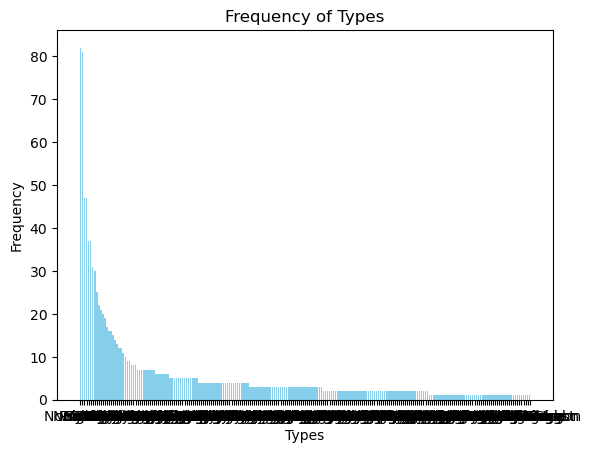

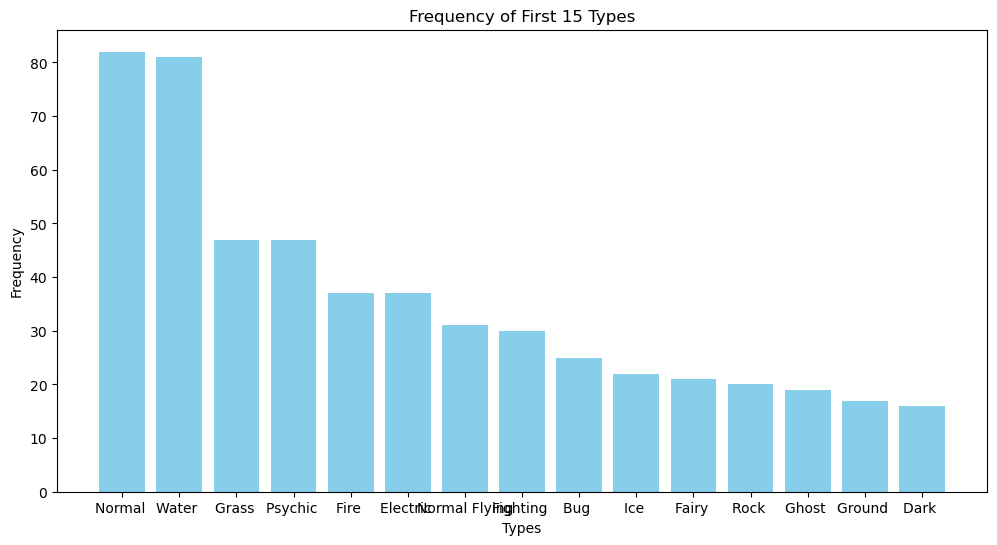

In [243]:
#Frequency of different Types
types_frequency = class_labels.value_counts()
plt.bar(types_frequency.index, types_frequency.values, color='skyblue')
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency of Types')
plt.show()
#Plot of the first 15 frequent type
first_fifteen = types_frequency[:15]
plt.figure(figsize=(12, 6))
plt.bar(first_fifteen.index, first_fifteen.values, color='skyblue')
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency of First 15 Types')
plt.show()

In [244]:
#Printing the data of types statistics
types_data =  data.groupby('Types')
types_data.describe()

HP                                                          \
              count       mean        std   min    25%   50%     75%    max   
Types                                                                         
Bug            25.0  48.920000  13.372609  25.0  40.00  47.0   50.00   80.0   
Bug Dark        1.0  71.000000        NaN  71.0  71.00  71.0   71.00   71.0   
Bug Electric    4.0  63.500000  12.233833  50.0  55.25  63.5   71.75   77.0   
Bug Fairy       2.0  50.000000  14.142136  40.0  45.00  50.0   55.00   60.0   
Bug Fighting    5.0  84.600000  13.501852  71.0  80.00  80.0   85.00  107.0   
...             ...        ...        ...   ...    ...   ...     ...    ...   
Water Ice       4.0  90.000000  32.659863  50.0  80.00  90.0  100.00  130.0   
Water Poison    3.0  61.666667  20.207259  40.0  52.50  65.0   72.50   80.0   
Water Psychic   7.0  84.714286  14.511080  60.0  79.00  90.0   95.00   95.0   
Water Rock      5.0  76.600000  18.568791  54.0  65.00  74.0   90.00  100.0   
Water Steel     1.0  84.000000        NaN  84.0  84.00  84.0   84.00   84.0   

              Attack              ... Height      Weight              \
               count        mean  ...    75%  max  count        mean   
Types                             ...                                  
Bug             25.0   48.480000  ...  0.700  1.5   25.0   10.324000   
Bug Dark         1.0  102.000000  ...  1.000  1.0    1.0   17.500000   
Bug Electric     4.0   69.000000  ...  0.975  1.5    4.0   17.600000   
Bug Fairy        2.0   50.000000  ...  0.175  0.2    2.0    0.350000   
Bug Fighting     5.0  144.200000  ...  2.400  3.2    5.0  113.420000   
...              ...         ...  ...    ...  ...    ...         ...   
Water Ice        4.0   85.000000  ...  2.125  2.5    4.0  161.875000   
Water Poison     3.0   68.333333  ...  1.250  1.6    3.0   34.800000   
Water Psychic    7.0   81.714286  ...  2.000  2.5    7.0   71.857143   
Water Rock       5.0   89.200000  ...  1.000  1.2    5.0   48.280000   
Water Steel      1.0   86.000000  ...  1.700  1.7    1.0   84.500000   

                                                                   
                      std    min      25%     50%      75%    max  
Types                                                              
Bug             11.663343    1.0    3.400    7.20   11.500   55.0  
Bug Dark              NaN   17.5   17.500   17.50   17.500   17.5  
Bug Electric    19.157766    0.6    8.025   12.40   21.975   45.0  
Bug Fairy        0.212132    0.2    0.275    0.35    0.425    0.5  
Bug Fighting   125.379153   25.0   54.000   62.50   92.000  333.6  
...                   ...    ...      ...     ...      ...    ...  
Water Ice       45.340150  120.0  129.375  153.75  186.250  220.0  
Water Poison    27.178484    3.9   24.700   45.50   50.250   55.0  
Water Psychic   33.900239   19.0   57.250   79.50   85.000  120.0  
Water Rock      47.674071    5.0   16.500   23.40   81.000  115.5  
Water Steel           NaN   84.5   84.500   84.50   84.500   84.5  

[221 rows x 64 columns]

In [245]:

columns_of_interest = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed', 'Height', 'Weight']

for column in columns_of_interest:
    col_by_type = types_data[column]
    type_mean = col_by_type.mean()
    print(f"Mean value of {column}: {type_mean}")



Mean value of HP: Types
Bug              48.920000
Bug Dark         71.000000
Bug Electric     63.500000
Bug Fairy        50.000000
Bug Fighting     84.600000
                   ...    
Water Ice        90.000000
Water Poison     61.666667
Water Psychic    84.714286
Water Rock       76.600000
Water Steel      84.000000
Name: HP, Length: 221, dtype: float64
Mean value of Attack: Types
Bug               48.480000
Bug Dark         102.000000
Bug Electric      69.000000
Bug Fairy         50.000000
Bug Fighting     144.200000
                    ...    
Water Ice         85.000000
Water Poison      68.333333
Water Psychic     81.714286
Water Rock        89.200000
Water Steel       86.000000
Name: Attack, Length: 221, dtype: float64
Mean value of Defense: Types
Bug               54.960000
Bug Dark          78.000000
Bug Electric      73.750000
Bug Fairy         50.000000
Bug Fighting      89.000000
                    ...    
Water Ice        110.000000
Water Poison      61.666667
Water Psyc

Text(0.5, 1.0, 'Height and Weight of Pokemon')

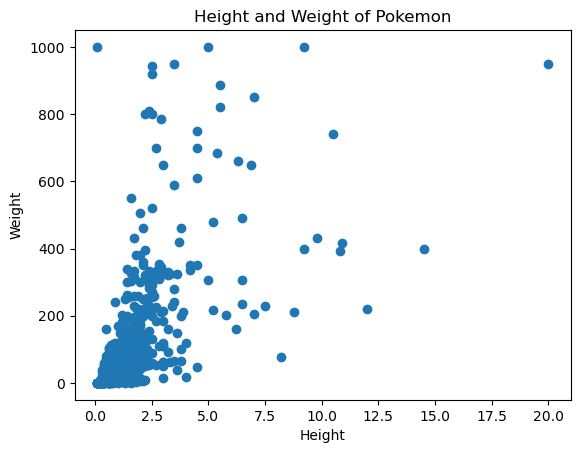

In [246]:
# Seeing if there is a correlation between height and weight
plt.scatter(data['Height'], data['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height and Weight of Pokemon")

Text(0.5, 1.0, 'Speed and Weight of Pokemon')

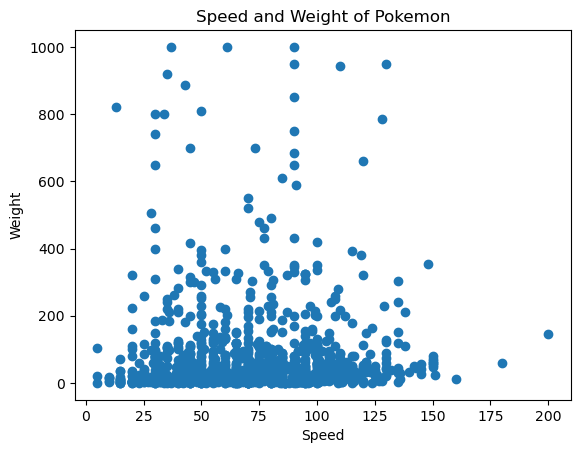

In [247]:
# Correlation between speed and weight
plt.scatter(data['Speed'], data['Weight'])
plt.xlabel('Speed')
plt.ylabel('Weight')
plt.title("Speed and Weight of Pokemon")

,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Height,Weight
HP,1.000000,0.464857,0.310397,0.356081,0.370945,0.173997,0.466987,0.464328
Attack,0.464857,1.000000,0.469804,0.327055,0.273846,0.374583,0.420909,0.418307
Defense,0.310397,0.469804,1.000000,0.227025,0.518449,0.008705,0.367452,0.470081
SP. Atk.,0.356081,0.327055,0.227025,1.000000,0.515499,0.423959,0.370129,0.230004
SP. Def,0.370945,0.273846,0.518449,0.515499,1.000000,0.232323,0.316484,0.299192
Speed,0.173997,0.374583,0.008705,0.423959,0.232323,1.000000,0.183282,0.055608
Height,0.466987,0.420909,0.367452,0.370129,0.316484,0.183282,1.000000,0.649579
Weight,0.464328,0.418307,0.470081,0.230004,0.299192,0.055608,0.649579,1.000000


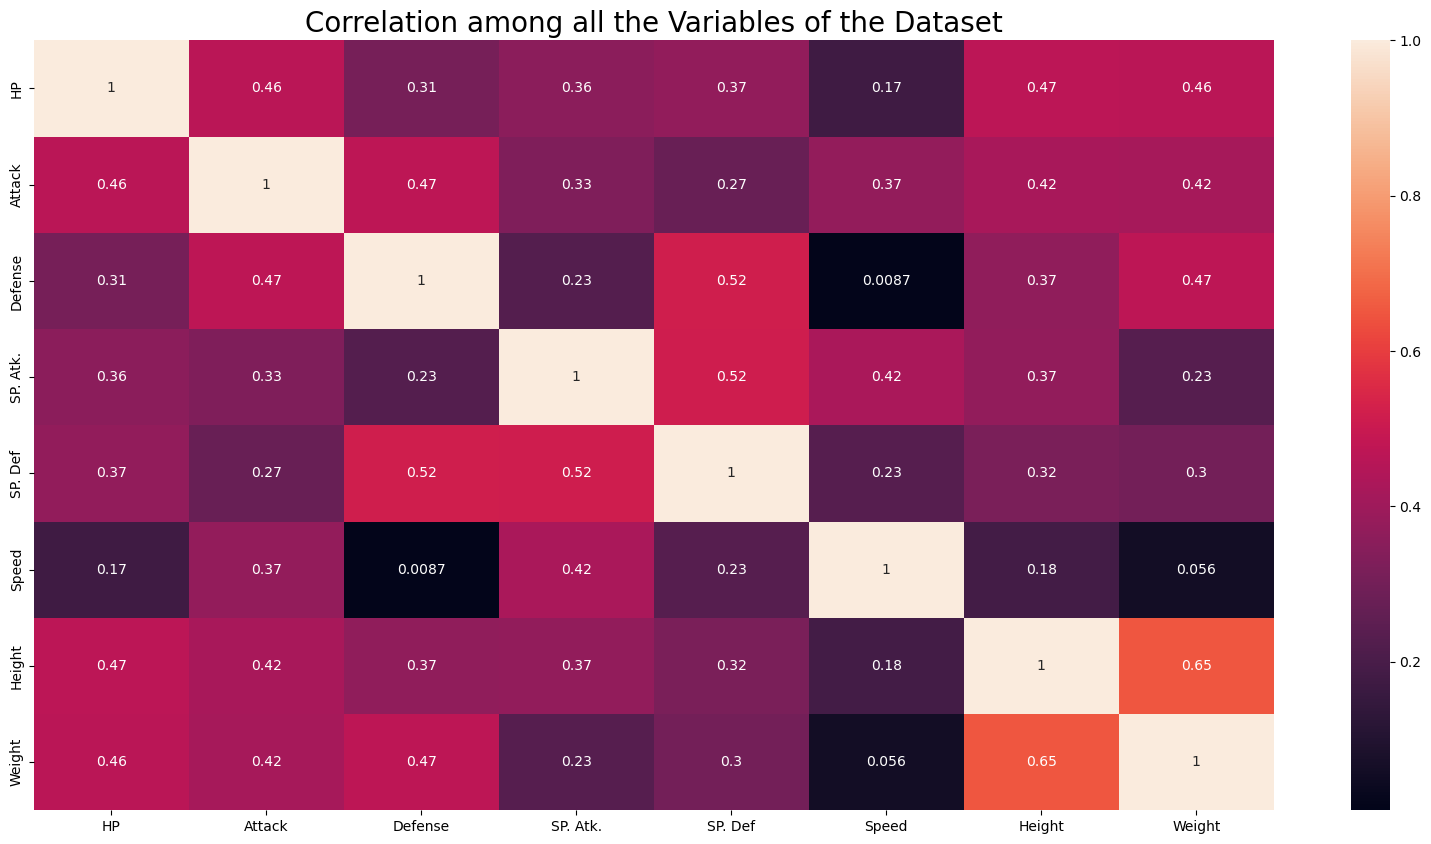

In [248]:
# Correlation Matrix between numerical columns
import seaborn as sns
cor=features.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor
# pd.plotting.scatter_matrix(data, figsize=(15,15))
# plt.show()

# Part 2: Modeling
Trying to predict what type a pokemon would be depending on their statistics.
### Classifers:
- K nearest neighbors
- Decision Trees
- Random Forest
- ADA Boosting
- Naive Bayes
- Stacking


In [249]:
# One Hot
one_hot_labels = pd.get_dummies(class_labels)
display(one_hot_labels)

,Bug,Bug Dark,Bug Electric,Bug Fairy,Bug Fighting,Bug Fire,Bug Flying,Bug Ghost,Bug Grass,Bug Ground,...,Water Fighting,Water Flying,Water Ghost,Water Grass,Water Ground,Water Ice,Water Poison,Water Psychic,Water Rock,Water Steel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### K nearest Neighbors

In [250]:
knn = KNeighborsClassifier()
scaler = StandardScaler()
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

param_grid = {
    'knn__n_neighbors': list(range(1, 25))
}

# Finding the best number of nearest neighbors
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(features, one_hot_labels)
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

# Cross validating CV = 5 because 10 is taking long
nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=5)                                        
print("Accuracy:", nested_score.mean()*100)

{'knn__n_neighbors': 1}
Accuracy: 6.505798728020951
Accuracy: 6.505798728020951


### Decision Trees

In [251]:
clf = DecisionTreeClassifier()

# No real reason for these numebers
params = {"max_depth": [5,19,15,20], 
          "min_samples_leaf": [5,19,15,20],
          "max_features": [5,10,15] }

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
grid_search.fit(features, one_hot_labels)
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)                                        
print("Accuracy:", nested_score.mean()*100)

{'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 5}
Accuracy: 2.882699044315206


KeyboardInterrupt: 

### Random Forest

In [ ]:
randomtree = RandomForestClassifier()

param_grid = {
    'max_depth': list(range(35, 46)),
    'min_samples_leaf': [8, 10, 12],
    'max_features': ['sqrt', 'log2']
}

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(randomtree, params, cv=5, scoring='accuracy')
grid_search.fit(features, one_hot_labels)
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)


nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=5)                                        
print("Accuracy:", nested_score.mean()*100)

### AdaBoost

In [ ]:
adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 70, 90, 120, 180, 200]
}

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(adaboost, params, cv=5, scoring='accuracy')
grid_search.fit(features, one_hot_labels)
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

# Doing 5 loops because 10 takes a while
nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)                                        
print("Accuracy:", nested_score.mean()*100)